In [1]:
import pandas as pd

path_train = 'datasets/cars/train-data.csv'
cars_train = pd.read_csv(path_train)

path_test = 'datasets/cars/test-data.csv'
cars_test = pd.read_csv(path_test)

cars_train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [2]:
cars_test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [3]:
print(cars_train.shape)
print(cars_test.shape)

(6019, 14)
(1234, 13)


In [4]:
cars_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [5]:
# Check for nulls
def check_nulls():
    print('Training set nulls\n-------------')
    for c in cars_train.columns:
        print(c, round(float(cars_train[c].isnull().sum())/len(cars_train[c]),4)*100, '%')
    
    print('\nTesting set nulls\n-------------')
    for c in cars_test.columns:
        print(c, round(float(cars_test[c].isnull().sum())/len(cars_test[c]),4)*100, '%')
 
check_nulls()


Training set nulls
-------------
Unnamed: 0 0.0 %
Name 0.0 %
Location 0.0 %
Year 0.0 %
Kilometers_Driven 0.0 %
Fuel_Type 0.0 %
Transmission 0.0 %
Owner_Type 0.0 %
Mileage 0.03 %
Engine 0.6 %
Power 0.6 %
Seats 0.7000000000000001 %
New_Price 86.31 %
Price 0.0 %

Testing set nulls
-------------
Unnamed: 0 0.0 %
Name 0.0 %
Location 0.0 %
Year 0.0 %
Kilometers_Driven 0.0 %
Fuel_Type 0.0 %
Transmission 0.0 %
Owner_Type 0.0 %
Mileage 0.0 %
Engine 0.8099999999999999 %
Power 0.8099999999999999 %
Seats 0.89 %
New_Price 85.25 %


In [6]:
# Drop colums with 80%+ nulls and Unnamed: 0
cars_train = cars_train.drop(columns=['Unnamed: 0', 'New_Price'])
cars_test = cars_test.drop(columns=['Unnamed: 0', 'New_Price'])

cars_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [7]:
cars_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [8]:
print("Mileage in train\n")
print(cars_train.Mileage.value_counts())
print("\nMileage in test\n")
print(cars_test.Mileage.value_counts())

Mileage in train

18.9 kmpl     172
17.0 kmpl     172
18.6 kmpl     119
20.36 kmpl     88
21.1 kmpl      86
             ... 
8.3 kmpl        1
8.0 kmpl        1
21.2 kmpl       1
11.07 kmpl      1
13.58 kmpl      1
Name: Mileage, Length: 442, dtype: int64

Mileage in test

17.0 kmpl     35
18.9 kmpl     29
18.6 kmpl     25
21.1 kmpl     20
18.0 kmpl     20
              ..
16.77 kmpl     1
15.9 kmpl      1
17.19 kmpl     1
11.74 kmpl     1
25.5 kmpl      1
Name: Mileage, Length: 301, dtype: int64


In [9]:
cars_train.Mileage=cars_train['Mileage'].fillna('17.0 kmpl')
cars_test.Mileage=cars_test['Mileage'].fillna('17.0 kmpl')  

string_vals = ['Power', 'Engine', 'Mileage']
# string -> list -> first element of list -> number
for col in string_vals:
    cars_train[col] = pd.to_numeric(cars_train[col].str.split().str.get(0), errors='coerce')
    cars_test[col] = pd.to_numeric(cars_test[col].str.split().str.get(0), errors='coerce')

  

In [10]:
cars_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [11]:
cars_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,NaN,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0


In [12]:
check_nulls()

Training set nulls
-------------
Name 0.0 %
Location 0.0 %
Year 0.0 %
Kilometers_Driven 0.0 %
Fuel_Type 0.0 %
Transmission 0.0 %
Owner_Type 0.0 %
Mileage 0.0 %
Engine 0.6 %
Power 2.3800000000000003 %
Seats 0.7000000000000001 %
Price 0.0 %

Testing set nulls
-------------
Name 0.0 %
Location 0.0 %
Year 0.0 %
Kilometers_Driven 0.0 %
Fuel_Type 0.0 %
Transmission 0.0 %
Owner_Type 0.0 %
Mileage 0.0 %
Engine 0.8099999999999999 %
Power 2.59 %
Seats 0.89 %


In [13]:
# drop rows with nulls

cars_train.dropna(subset=['Mileage', 'Engine', 'Power', 'Seats'],inplace=True)
cars_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [14]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

cars_num = cars_test.drop (['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type'], axis=1)
imputer.fit(cars_num)

X = imputer.transform(cars_num)

cars_test_tr = pd.DataFrame(X, columns=cars_num.columns, index=cars_num.index)

cars_test['Mileage'] = cars_test_tr['Mileage']  
cars_test['Engine'] = cars_test_tr['Engine']
cars_test['Power'] = cars_test_tr['Power']
cars_test['Seats'] = cars_test_tr['Seats']


In [15]:
check_nulls()

Training set nulls
-------------
Name 0.0 %
Location 0.0 %
Year 0.0 %
Kilometers_Driven 0.0 %
Fuel_Type 0.0 %
Transmission 0.0 %
Owner_Type 0.0 %
Mileage 0.0 %
Engine 0.0 %
Power 0.0 %
Seats 0.0 %
Price 0.0 %

Testing set nulls
-------------
Name 0.0 %
Location 0.0 %
Year 0.0 %
Kilometers_Driven 0.0 %
Fuel_Type 0.0 %
Transmission 0.0 %
Owner_Type 0.0 %
Mileage 0.0 %
Engine 0.0 %
Power 0.0 %
Seats 0.0 %


In [16]:
cars_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5874 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5874 non-null   object 
 1   Location           5874 non-null   object 
 2   Year               5874 non-null   int64  
 3   Kilometers_Driven  5874 non-null   int64  
 4   Fuel_Type          5874 non-null   object 
 5   Transmission       5874 non-null   object 
 6   Owner_Type         5874 non-null   object 
 7   Mileage            5874 non-null   float64
 8   Engine             5874 non-null   float64
 9   Power              5874 non-null   float64
 10  Seats              5874 non-null   float64
 11  Price              5874 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 596.6+ KB


In [17]:
cars_train.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5874.000000,5.874000e+03,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000
mean,2013.477698,5.831315e+04,18.277404,1625.510385,113.257732,5.283623,9.605032
std,3.164366,9.215397e+04,4.364977,601.885055,53.883531,0.804961,11.247700
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.343125e+04,15.260000,1198.000000,75.000000,5.000000,3.520000
50%,2014.000000,5.258800e+04,18.200000,1495.500000,97.700000,5.000000,5.750000
75%,2016.000000,7.239725e+04,21.100000,1991.000000,138.100000,5.000000,10.037500
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


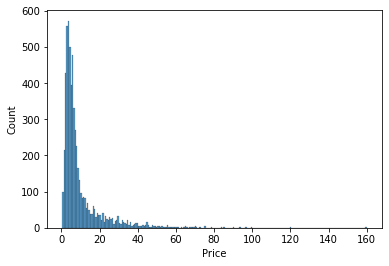

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(cars_train['Price'])
plt.show()

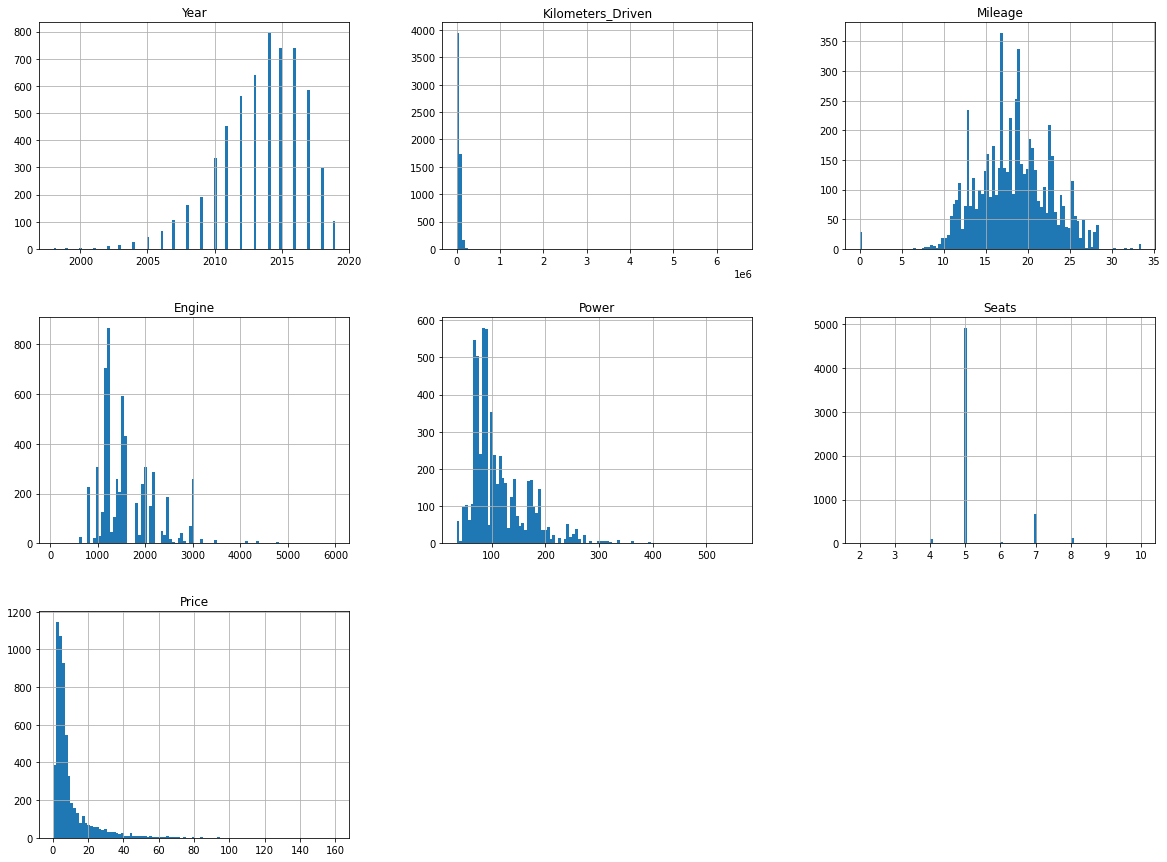

In [19]:
%matplotlib inline
cars_train.hist(bins=100, figsize=(20,15))
plt.show()

In [20]:
# Name
print('train data:')
print(cars_train.Name.value_counts())
print('-'*30)
print('test_data:')
print(cars_test.Name.value_counts())

train data:
Mahindra XUV500 W8 2WD                      49
Maruti Swift VDI                            45
Honda City 1.5 S MT                         34
Maruti Swift Dzire VDI                      34
Hyundai i10 Sportz                          30
                                            ..
Volkswagen Vento IPL II Petrol Trendline     1
Hyundai Elantra CRDi S                       1
Mahindra Logan Petrol 1.4 GLE                1
Hyundai Elite i20 Diesel Asta Option         1
Honda Mobilio E i DTEC                       1
Name: Name, Length: 1813, dtype: int64
------------------------------
test_data:
Maruti Alto LXi                                 9
Volkswagen Polo 1.2 MPI Highline                8
Honda City 1.5 V MT                             8
Maruti Swift Dzire VDI                          8
Hyundai i10 Magna                               7
                                               ..
BMW X1 xDrive 20d xLine                         1
Tata Tiago 1.2 Revotron XZ WO Alloy     

In [21]:
print('train data:')
print(cars_train.Name.value_counts())
print('test data:')
print(cars_test.Name.value_counts())
for i in cars_train.index:
    cars_train.at[i,'Brand']=cars_train.loc[i,'Name'].split()[0]
    cars_train.at[i,'Model']=cars_train.loc[i,'Name'].split()[1]
for i in cars_test.index:
    cars_test.at[i,'Brand']=cars_test.at[i,'Name'].split()[0]
    cars_test.at[i,'Model']=cars_test.at[i,'Name'].split()[1]

train data:
Mahindra XUV500 W8 2WD                      49
Maruti Swift VDI                            45
Honda City 1.5 S MT                         34
Maruti Swift Dzire VDI                      34
Hyundai i10 Sportz                          30
                                            ..
Volkswagen Vento IPL II Petrol Trendline     1
Hyundai Elantra CRDi S                       1
Mahindra Logan Petrol 1.4 GLE                1
Hyundai Elite i20 Diesel Asta Option         1
Honda Mobilio E i DTEC                       1
Name: Name, Length: 1813, dtype: int64
test data:
Maruti Alto LXi                                 9
Volkswagen Polo 1.2 MPI Highline                8
Honda City 1.5 V MT                             8
Maruti Swift Dzire VDI                          8
Hyundai i10 Magna                               7
                                               ..
BMW X1 xDrive 20d xLine                         1
Tata Tiago 1.2 Revotron XZ WO Alloy             1
Mini Cooper S        

In [22]:
cars_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4


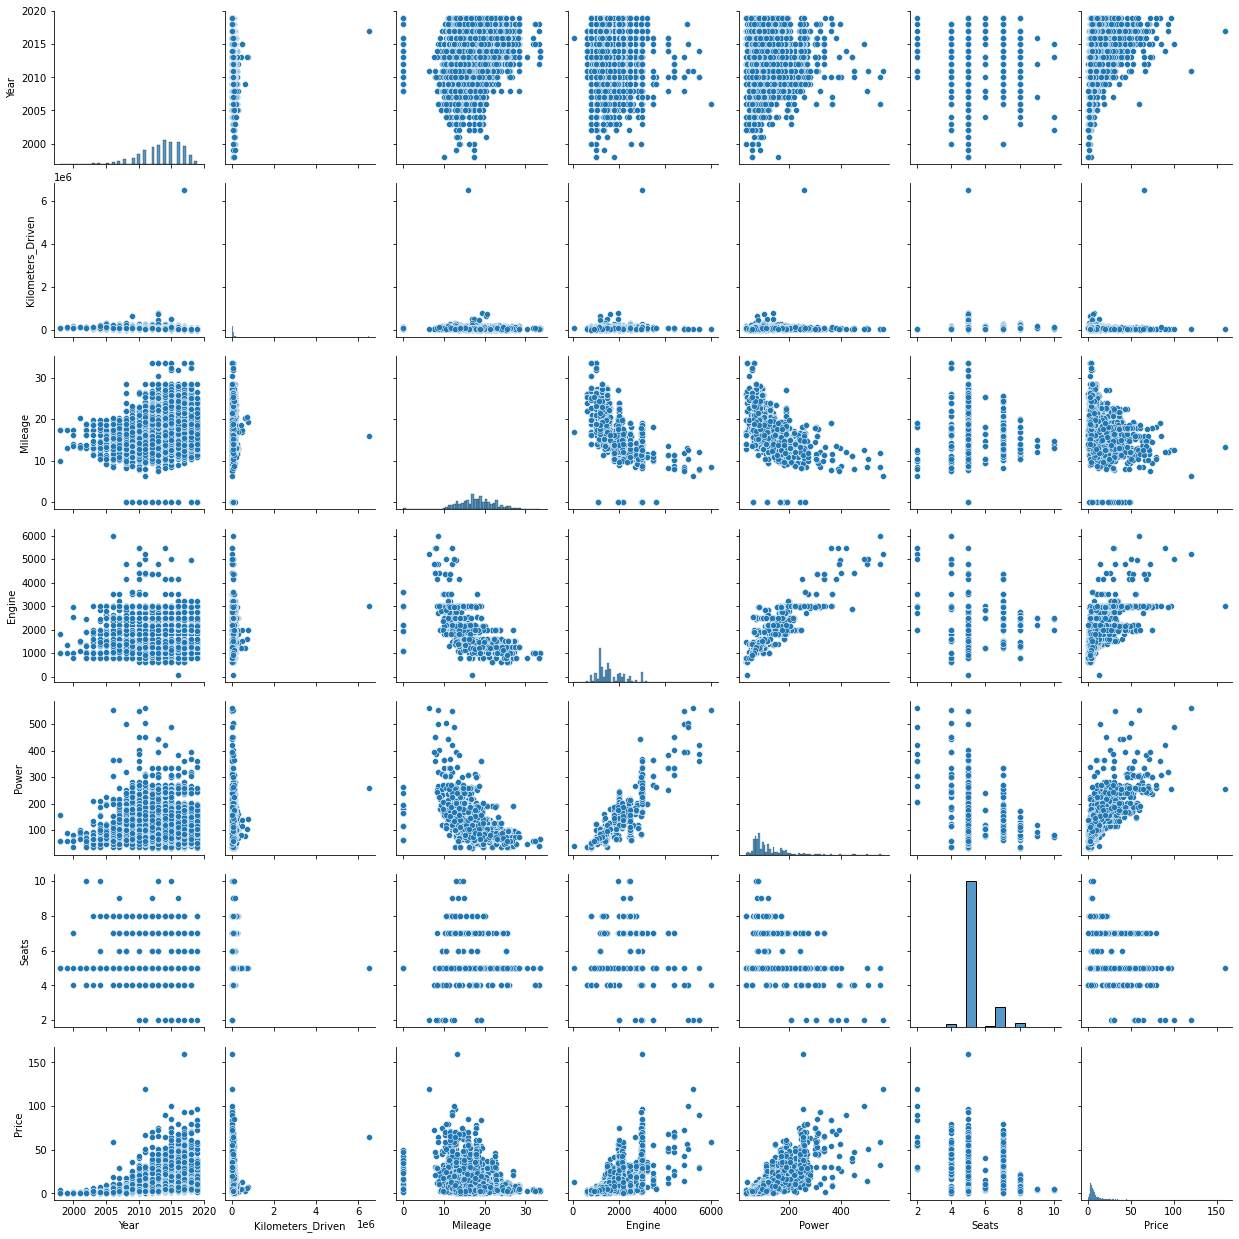

In [23]:
z1 = sns.pairplot(cars_train)
z1

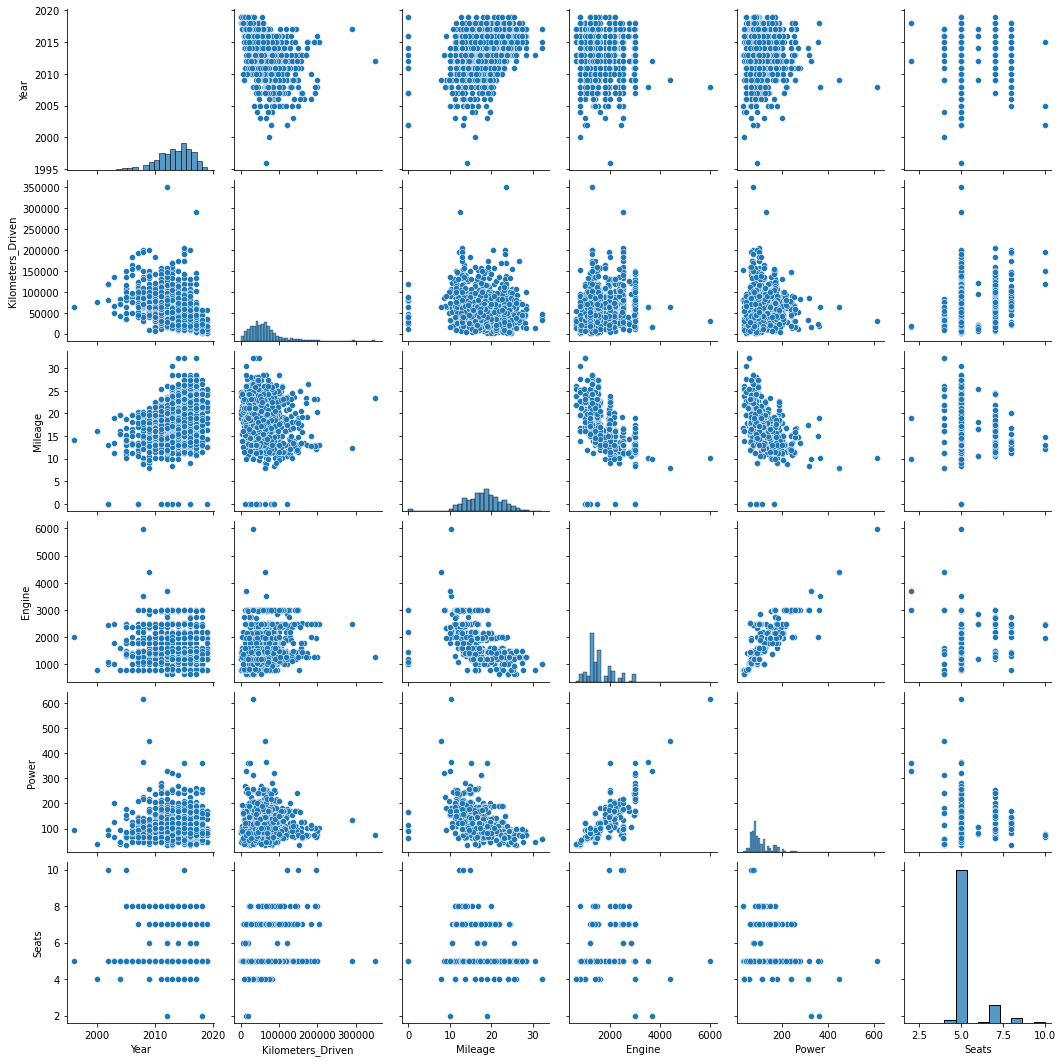

In [24]:
z2 = sns.pairplot(cars_test)
z2

In [25]:
cars_train = cars_train.drop("Name", axis=1)
cars_train.head()
cars_test = cars_test.drop("Name", axis=1)

In [26]:
corr_matrix = cars_train.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price                1.000000
Power                0.772572
Engine               0.657541
Year                 0.299443
Seats                0.055510
Kilometers_Driven   -0.008260
Mileage             -0.341671
Name: Price, dtype: float64

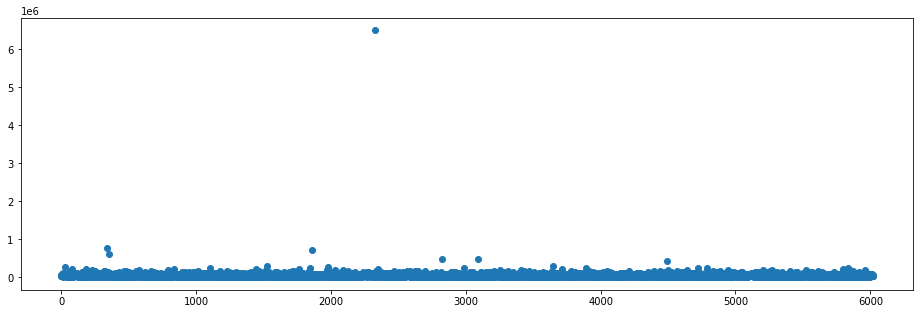

In [27]:
# Kilometers Driven

fg,ax=plt.subplots(1,1,figsize=(16,5))
z=plt.scatter(x=cars_train.index,y=cars_train.Kilometers_Driven)
cars_train.drop(index=cars_train.Kilometers_Driven.idxmax(),inplace=True)

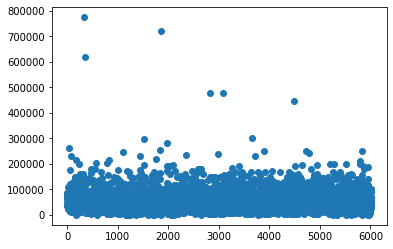

In [28]:
z=plt.scatter(x=cars_train.index,y=cars_train.Kilometers_Driven)

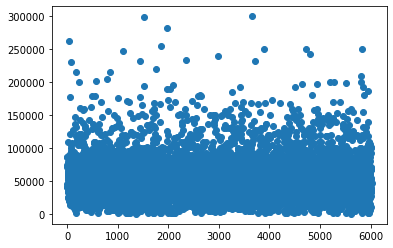

In [29]:
for i in cars_train.index:
    if cars_train.Kilometers_Driven[i]>400000:
        cars_train.drop(index=i,inplace=True)
        
plt.scatter(cars_train.index,cars_train.Kilometers_Driven)

<AxesSubplot:xlabel='Price', ylabel='Kilometers_Driven'>

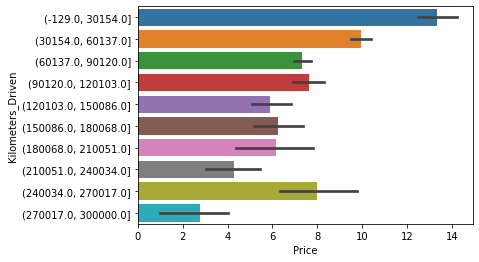

In [30]:
sns.barplot(data=cars_train,y=pd.cut(cars_train['Kilometers_Driven'],10,precision=0),x='Price')

<AxesSubplot:xlabel='count', ylabel='Kilometers_Driven'>

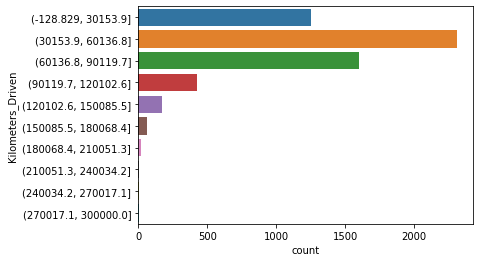

In [31]:
sns.countplot(y=pd.cut(cars_train.Kilometers_Driven,10,precision=10))

In [32]:
# Year
cars_train.Year.nunique()

22

<AxesSubplot:xlabel='Year', ylabel='Price'>

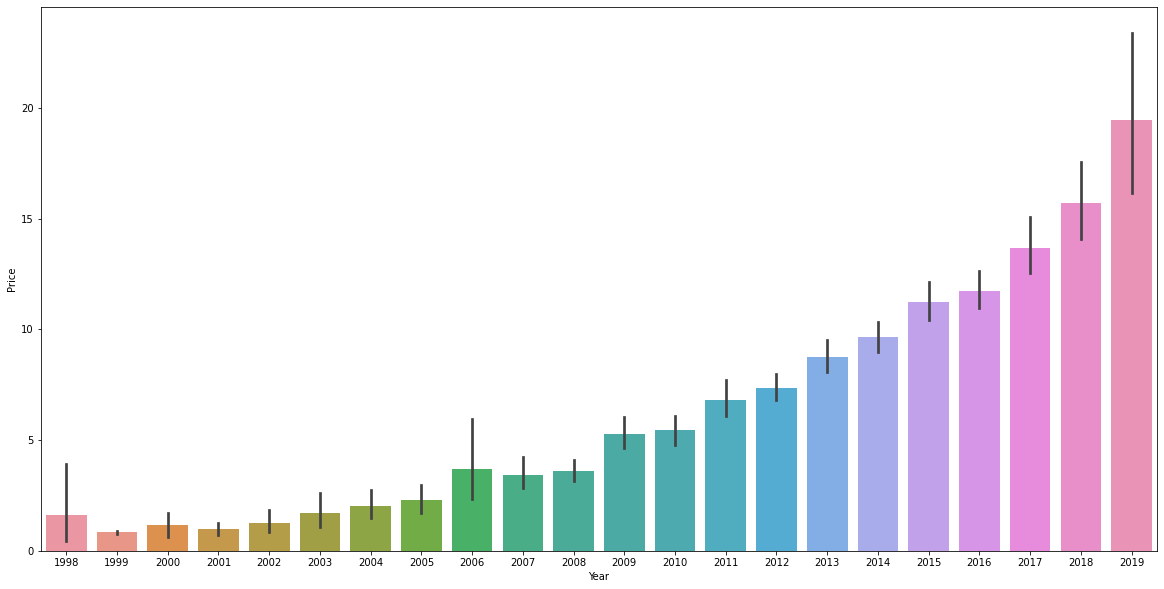

In [33]:
fg,ax=plt.subplots(1,1,figsize=(20,10))
sns.barplot(x='Year',y='Price',data=cars_train)

<AxesSubplot:xlabel='count', ylabel='Year'>

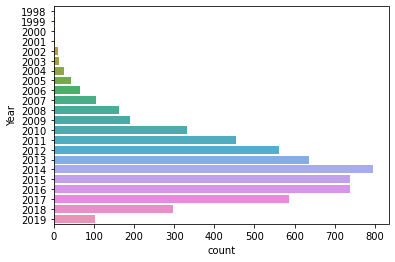

In [34]:
sns.countplot(y='Year',data=cars_train)

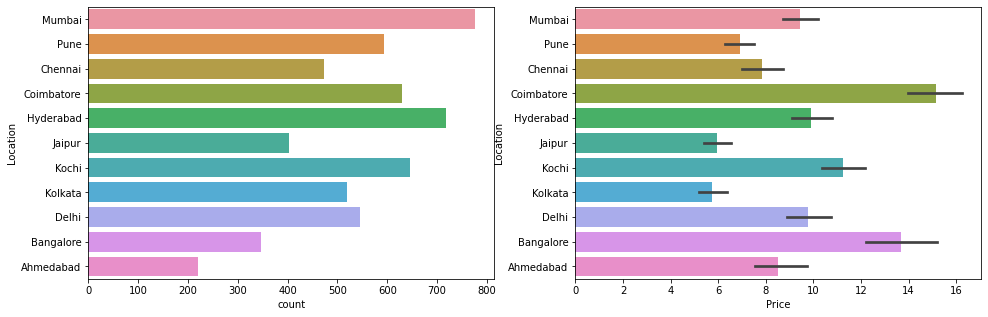

In [35]:
# Location

fg,ax=plt.subplots(1,2,figsize=(16,5))
z1=sns.countplot(data=cars_train,y='Location',ax=ax[0])
z2=sns.barplot(data=cars_train,y='Location',x='Price',ax=ax[1])

In [36]:
# Fuel Type
print("Fueals in train\n")
print(cars_train.Fuel_Type.value_counts())
print("\nFueals in test\n")
print(cars_test.Fuel_Type.value_counts())

Fueals in train

Diesel      3148
Petrol      2652
CNG           55
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

Fueals in test

Diesel    647
Petrol    579
CNG         6
LPG         2
Name: Fuel_Type, dtype: int64


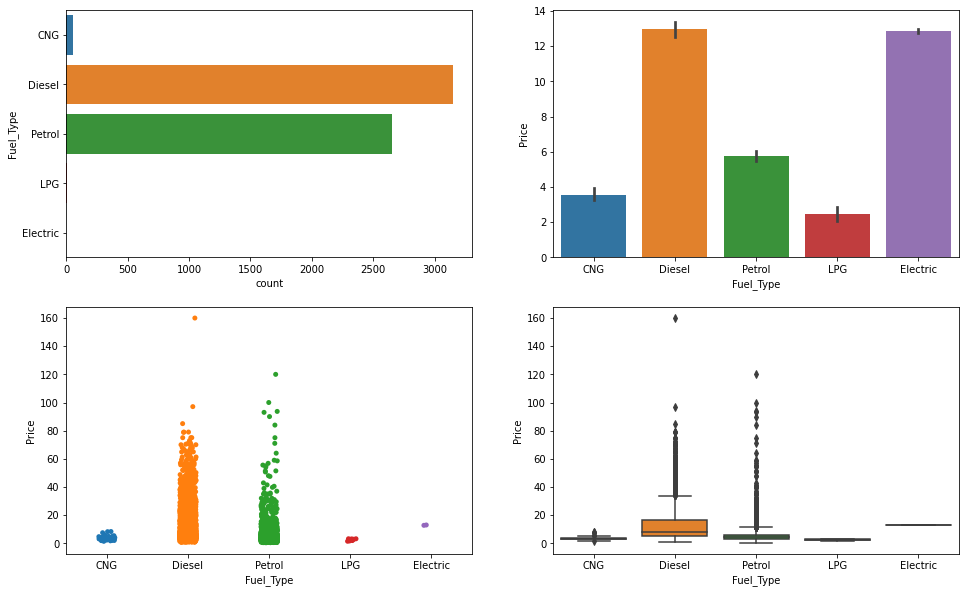

In [37]:
fg,ax=plt.subplots(2,2,figsize=(16,10))
z1=sns.countplot(data=cars_train,y='Fuel_Type',ax=ax[0][0])
z2=sns.barplot(data=cars_train,x='Fuel_Type',y='Price',ax=ax[0][1])
z3=sns.stripplot(data=cars_train,x='Fuel_Type',y='Price',ax=ax[1][0])
z4=sns.boxplot(data=cars_train,x='Fuel_Type',y='Price',ax=ax[1][1])

In [38]:
# Transmission

print("Transmission in train\n")
print(cars_train.Transmission.value_counts())
print("\nTransmission in test\n")
print(cars_test.Transmission.value_counts())

Transmission in train

Manual       4166
Automatic    1701
Name: Transmission, dtype: int64

Transmission in test

Manual       905
Automatic    329
Name: Transmission, dtype: int64


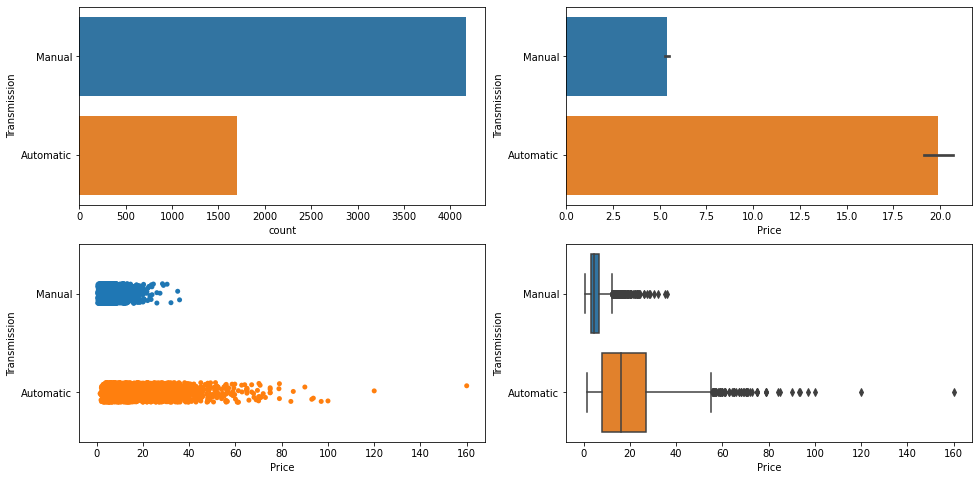

In [39]:
fig,ax=plt.subplots(2,2,figsize=(16,8))
z1=sns.countplot(data=cars_train,y='Transmission',ax=ax[0][0])
z2=sns.barplot(data=cars_train,y='Transmission',x='Price',ax=ax[0][1])
z3=sns.stripplot(data=cars_train,y='Transmission',x='Price',ax=ax[1][0])
z4=sns.boxplot(data=cars_train,y='Transmission',x='Price',ax=ax[1][1])

In [40]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[['Manual', 'Automatic']])
cars_cat = ordinal_encoder.fit_transform(cars_train[['Transmission']])
cars_train[['Transmission']] = cars_cat


In [41]:
cars_train

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Mumbai,2010,72000,CNG,0.0,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon
1,Pune,2015,41000,Diesel,0.0,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta
2,Chennai,2011,46000,Petrol,0.0,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz
3,Chennai,2012,87000,Diesel,0.0,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga
4,Coimbatore,2013,40670,Diesel,1.0,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,0.0,First,28.40,1248.0,74.00,5.0,4.75,Maruti,Swift
6015,Jaipur,2015,100000,Diesel,0.0,First,24.40,1120.0,71.00,5.0,4.00,Hyundai,Xcent
6016,Jaipur,2012,55000,Diesel,0.0,Second,14.00,2498.0,112.00,8.0,2.90,Mahindra,Xylo
6017,Kolkata,2013,46000,Petrol,0.0,First,18.90,998.0,67.10,5.0,2.65,Maruti,Wagon


In [42]:
cars_cat = ordinal_encoder.fit_transform(cars_test[['Transmission']])
cars_test[['Transmission']] = cars_cat

In [43]:
cars_test

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model
0,Delhi,2014,40929,CNG,0.0,First,32.26,998.0,58.20,4.0,Maruti,Alto
1,Coimbatore,2013,54493,Petrol,0.0,Second,24.70,796.0,47.30,5.0,Maruti,Alto
2,Mumbai,2017,34000,Diesel,0.0,First,13.68,2393.0,147.80,7.0,Toyota,Innova
3,Hyderabad,2012,139000,Diesel,0.0,First,23.59,1364.0,93.70,5.0,Toyota,Etios
4,Mumbai,2014,29000,Petrol,0.0,First,18.50,1197.0,82.85,5.0,Hyundai,i20
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Hyderabad,2011,89411,Diesel,0.0,First,20.54,1598.0,103.60,5.0,Volkswagen,Vento
1230,Mumbai,2015,59000,Petrol,1.0,First,17.21,1197.0,103.60,5.0,Volkswagen,Polo
1231,Kolkata,2012,28000,Diesel,0.0,First,23.08,1461.0,63.10,5.0,Nissan,Micra
1232,Pune,2013,52262,Petrol,1.0,Third,17.20,1197.0,103.60,5.0,Volkswagen,Polo


In [44]:
# Owner_type

cars_train.Owner_Type.value_counts()

First             4834
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64

(0.0, 100.0)

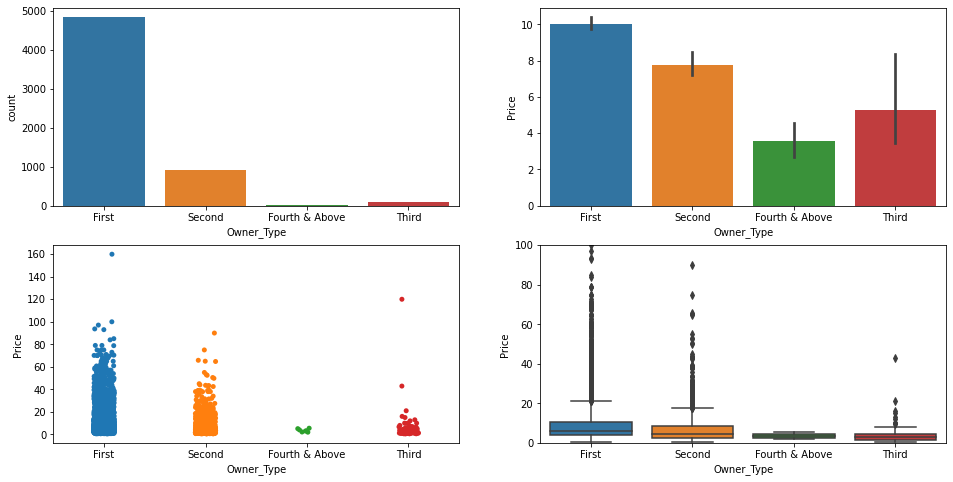

In [45]:
fg,ax=plt.subplots(2,2,figsize=(16,8))
z1=sns.countplot(x='Owner_Type',data=cars_train,ax=ax[0][0])
z2=sns.barplot(x='Owner_Type',y='Price',data=cars_train,ax=ax[0][1])
z3=sns.stripplot(x='Owner_Type',y='Price',data=cars_train,ax=ax[1][0])
z4=sns.boxplot(x='Owner_Type',y='Price',data=cars_train,ax=ax[1][1])
ax[1][1].set_ylim([0,100])

In [46]:
ordinal_encoder = OrdinalEncoder(categories=[['First', 'Second', 'Third', 'Fourth & Above']])
ordinal_encoder.categories

[['First', 'Second', 'Third', 'Fourth & Above']]

In [47]:
cars_cat = ordinal_encoder.fit_transform(cars_train[['Owner_Type']])
cars_train[['Owner_Type']] = cars_cat
cars_train

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Mumbai,2010,72000,CNG,0.0,0.0,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon
1,Pune,2015,41000,Diesel,0.0,0.0,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta
2,Chennai,2011,46000,Petrol,0.0,0.0,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz
3,Chennai,2012,87000,Diesel,0.0,0.0,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga
4,Coimbatore,2013,40670,Diesel,1.0,1.0,15.20,1968.0,140.80,5.0,17.74,Audi,A4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,0.0,0.0,28.40,1248.0,74.00,5.0,4.75,Maruti,Swift
6015,Jaipur,2015,100000,Diesel,0.0,0.0,24.40,1120.0,71.00,5.0,4.00,Hyundai,Xcent
6016,Jaipur,2012,55000,Diesel,0.0,1.0,14.00,2498.0,112.00,8.0,2.90,Mahindra,Xylo
6017,Kolkata,2013,46000,Petrol,0.0,0.0,18.90,998.0,67.10,5.0,2.65,Maruti,Wagon


In [48]:
cars_cat = ordinal_encoder.fit_transform(cars_test[['Owner_Type']])
cars_test[['Owner_Type']] = cars_cat
cars_test

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model
0,Delhi,2014,40929,CNG,0.0,0.0,32.26,998.0,58.20,4.0,Maruti,Alto
1,Coimbatore,2013,54493,Petrol,0.0,1.0,24.70,796.0,47.30,5.0,Maruti,Alto
2,Mumbai,2017,34000,Diesel,0.0,0.0,13.68,2393.0,147.80,7.0,Toyota,Innova
3,Hyderabad,2012,139000,Diesel,0.0,0.0,23.59,1364.0,93.70,5.0,Toyota,Etios
4,Mumbai,2014,29000,Petrol,0.0,0.0,18.50,1197.0,82.85,5.0,Hyundai,i20
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Hyderabad,2011,89411,Diesel,0.0,0.0,20.54,1598.0,103.60,5.0,Volkswagen,Vento
1230,Mumbai,2015,59000,Petrol,1.0,0.0,17.21,1197.0,103.60,5.0,Volkswagen,Polo
1231,Kolkata,2012,28000,Diesel,0.0,0.0,23.08,1461.0,63.10,5.0,Nissan,Micra
1232,Pune,2013,52262,Petrol,1.0,2.0,17.20,1197.0,103.60,5.0,Volkswagen,Polo


In [49]:
# Mileage

print(cars_train.Mileage.value_counts())
cars_train.Mileage.describe()

18.90    172
17.00    151
18.60    119
20.36     87
21.10     87
        ... 
19.68      1
21.72      1
14.45      1
15.42      1
8.77       1
Name: Mileage, Length: 429, dtype: int64


count    5867.000000
mean       18.277218
std         4.367222
min         0.000000
25%        15.260000
50%        18.200000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

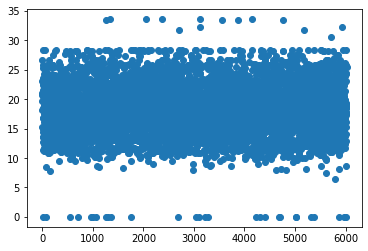

In [50]:
plt.scatter(cars_train.index,cars_train.Mileage) 

<ipython-input-51-d5ec4b76de62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_train.Mileage[i]=17.00


count    5867.000000
mean       18.358350
std         4.180824
min         6.400000
25%        15.300000
50%        18.200000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

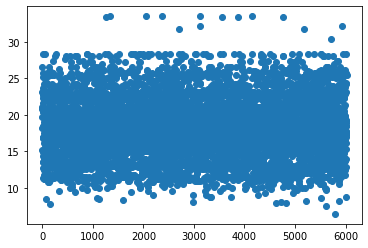

In [51]:
for i in cars_train.index:
    if cars_train.Mileage[i]==0:
        cars_train.Mileage[i]=17.00
        
plt.scatter(cars_train.index,cars_train.Mileage)
cars_train.Mileage.describe()

count    1234.000000
mean       18.173857
std         4.464615
min         0.000000
25%        15.215000
50%        18.250000
75%        21.100000
max        32.260000
Name: Mileage, dtype: float64

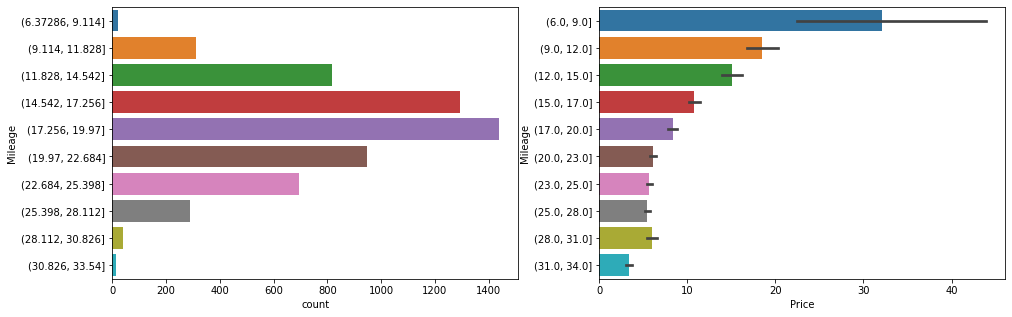

In [52]:
fig,ax=plt.subplots(1,2,figsize=(16,5))

z1=sns.countplot(y=pd.cut(cars_train.Mileage,10,precision=10),ax=ax[0])

z2=sns.barplot(y=pd.cut(cars_train.Mileage,10,precision=0),x='Price',data=cars_train,ax=ax[1])

cars_test.Mileage.describe()

In [53]:
# check how many abnormal point about Mileage in train data

print(cars_test.Mileage.describe())

cars_test.Mileage.value_counts()

count    1234.000000
mean       18.173857
std         4.464615
min         0.000000
25%        15.215000
50%        18.250000
75%        21.100000
max        32.260000
Name: Mileage, dtype: float64


17.00    35
18.90    29
18.60    25
21.10    20
18.00    20
         ..
10.80     1
17.97     1
18.33     1
11.07     1
12.83     1
Name: Mileage, Length: 298, dtype: int64

In [54]:
print(cars_test.Mileage.describe())

count    1234.000000
mean       18.173857
std         4.464615
min         0.000000
25%        15.215000
50%        18.250000
75%        21.100000
max        32.260000
Name: Mileage, dtype: float64


In [55]:
cars_train.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
Model                0
dtype: int64

In [56]:
# Engine
cars_train

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Mumbai,2010,72000,CNG,0.0,0.0,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon
1,Pune,2015,41000,Diesel,0.0,0.0,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta
2,Chennai,2011,46000,Petrol,0.0,0.0,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz
3,Chennai,2012,87000,Diesel,0.0,0.0,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga
4,Coimbatore,2013,40670,Diesel,1.0,1.0,15.20,1968.0,140.80,5.0,17.74,Audi,A4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,0.0,0.0,28.40,1248.0,74.00,5.0,4.75,Maruti,Swift
6015,Jaipur,2015,100000,Diesel,0.0,0.0,24.40,1120.0,71.00,5.0,4.00,Hyundai,Xcent
6016,Jaipur,2012,55000,Diesel,0.0,1.0,14.00,2498.0,112.00,8.0,2.90,Mahindra,Xylo
6017,Kolkata,2013,46000,Petrol,0.0,0.0,18.90,998.0,67.10,5.0,2.65,Maruti,Wagon


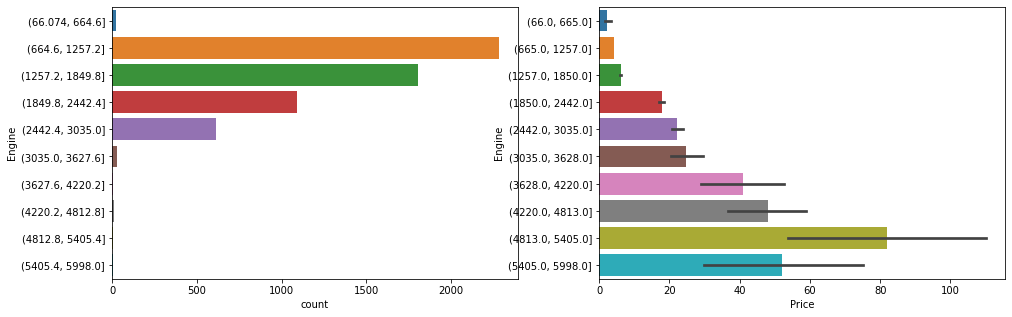

In [57]:
fig,ax=plt.subplots(1,2,figsize=(16,5))

z1=sns.countplot(y=pd.cut(cars_train.Engine,10,precision=10),ax=ax[0])

z2=sns.barplot(y=pd.cut(cars_train.Engine,10,precision=0),x='Price',data=cars_train, ax=ax[1])

In [58]:
# Seats

print(cars_train.Seats.value_counts())

print(cars_test.Seats.value_counts())

5.0     4914
7.0      672
8.0      133
4.0       99
6.0       29
2.0       13
10.0       4
9.0        3
Name: Seats, dtype: int64
5.0     1044
7.0      122
8.0       36
4.0       20
6.0        7
10.0       3
2.0        2
Name: Seats, dtype: int64


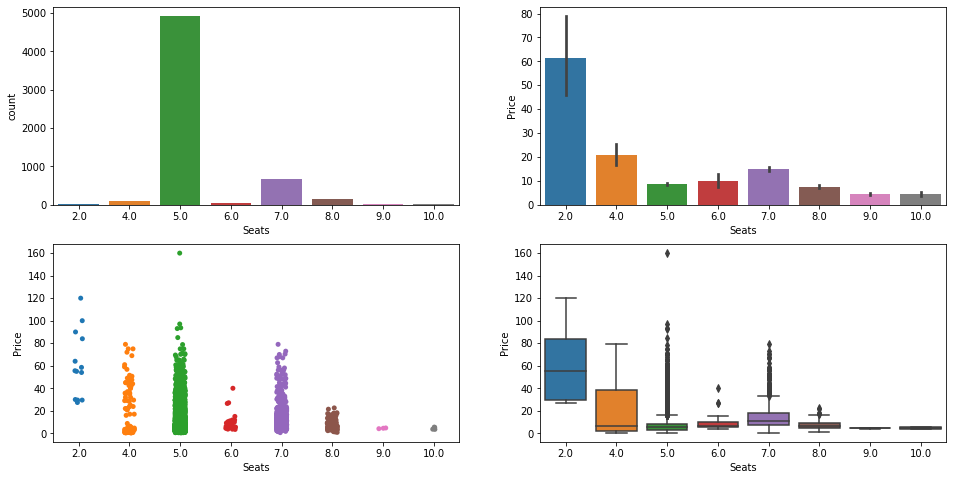

In [59]:
fig,ax=plt.subplots(2,2,figsize=(16,8))
z1=sns.countplot(data=cars_train,x='Seats',ax=ax[0][0])
z2=sns.barplot(data=cars_train,x='Seats',y='Price',ax=ax[0][1])
z3=sns.stripplot(data=cars_train,x='Seats',y='Price',ax=ax[1][0])
z4=sns.boxplot(data=cars_train,x='Seats',y='Price',ax=ax[1][1])

In [60]:
cars_train.Brand.value_counts()

Maruti           1175
Hyundai          1056
Honda             599
Toyota            395
Mercedes-Benz     316
Volkswagen        312
Ford              294
Mahindra          269
BMW               261
Audi              235
Tata              183
Skoda             171
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Lamborghini         1
Isuzu               1
Bentley             1
Name: Brand, dtype: int64

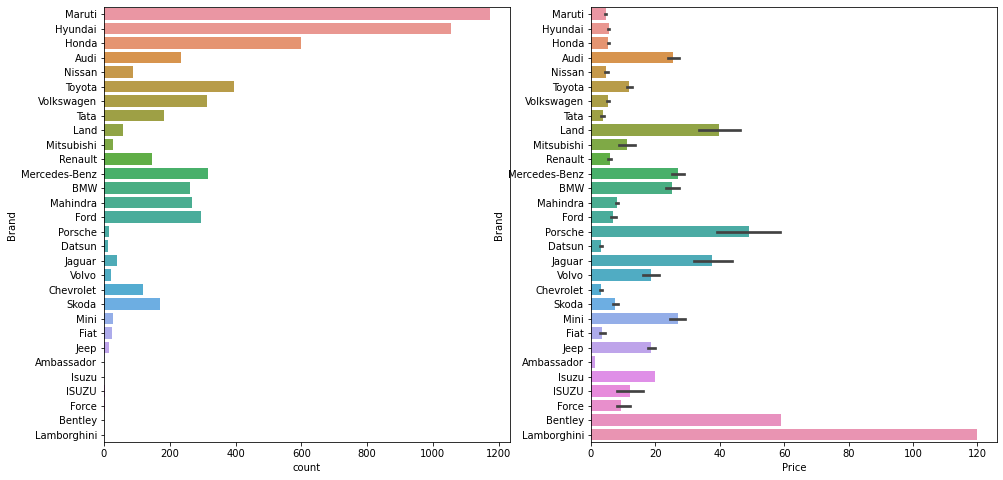

In [61]:
fig,ax=plt.subplots(1,2,figsize=(16,8))
z1=sns.countplot(data=cars_train,y='Brand',ax=ax[0])
z2=sns.barplot(data=cars_train,y='Brand',x='Price',ax=ax[1])

In [62]:
cars_test.Brand.value_counts()

Maruti           233
Hyundai          233
Honda            135
Toyota            96
Mercedes-Benz     62
Volkswagen        59
Mahindra          59
Ford              51
Audi              49
BMW               45
Tata              42
Chevrolet         30
Skoda             29
Nissan            26
Renault           25
Fiat              10
Mitsubishi         9
Jaguar             8
Land               7
Volvo              7
Mini               5
Jeep               4
Datsun             4
ISUZU              1
OpelCorsa          1
Hindustan          1
Bentley            1
Isuzu              1
Porsche            1
Name: Brand, dtype: int64

In [63]:
for i in cars_train.index:
    if cars_train.Brand[i] in ['Audi','Land','Porsche','Bentley','Jaguar']:
        cars_train.Brand[i]=1
    else:
        cars_train.Brand[i]=0
for i in cars_test.index:
    if cars_test.Brand[i] in ['Audi','Land','Porsche','Bentley','Jaguar']:
        cars_test.Brand[i]=1
    else:
        cars_test.Brand[i]=0

<ipython-input-63-faa3f45afca7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_train.Brand[i]=0
<ipython-input-63-faa3f45afca7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_train.Brand[i]=1
<ipython-input-63-faa3f45afca7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_test.Brand[i]=0
<ipython-input-63-faa3f45afca7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

In [64]:
cars_train

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Mumbai,2010,72000,CNG,0.0,0.0,26.60,998.0,58.16,5.0,1.75,0,Wagon
1,Pune,2015,41000,Diesel,0.0,0.0,19.67,1582.0,126.20,5.0,12.50,0,Creta
2,Chennai,2011,46000,Petrol,0.0,0.0,18.20,1199.0,88.70,5.0,4.50,0,Jazz
3,Chennai,2012,87000,Diesel,0.0,0.0,20.77,1248.0,88.76,7.0,6.00,0,Ertiga
4,Coimbatore,2013,40670,Diesel,1.0,1.0,15.20,1968.0,140.80,5.0,17.74,1,A4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,0.0,0.0,28.40,1248.0,74.00,5.0,4.75,0,Swift
6015,Jaipur,2015,100000,Diesel,0.0,0.0,24.40,1120.0,71.00,5.0,4.00,0,Xcent
6016,Jaipur,2012,55000,Diesel,0.0,1.0,14.00,2498.0,112.00,8.0,2.90,0,Xylo
6017,Kolkata,2013,46000,Petrol,0.0,0.0,18.90,998.0,67.10,5.0,2.65,0,Wagon


In [65]:
from sklearn.preprocessing import LabelEncoder

Loca=pd.get_dummies(cars_train.Location, drop_first=True)

Fu_Type=pd.get_dummies(cars_train.Fuel_Type,drop_first=True)

# df_train.replace({'First':1,'Second':2,'Third':3, 'Fourth & Above':4},inplace=True)

In [66]:
cars_train=pd.concat([cars_train,Loca,Fu_Type],axis=1)

In [67]:
cars_train.head(10)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,...,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Diesel,Electric,LPG,Petrol
0,Mumbai,2010,72000,CNG,0.0,0.0,26.60,998.0,58.16,5.0,...,0,0,0,0,1,0,0,0,0,0
1,Pune,2015,41000,Diesel,0.0,0.0,19.67,1582.0,126.20,5.0,...,0,0,0,0,0,1,1,0,0,0
2,Chennai,2011,46000,Petrol,0.0,0.0,18.20,1199.0,88.70,5.0,...,0,0,0,0,0,0,0,0,0,1
3,Chennai,2012,87000,Diesel,0.0,0.0,20.77,1248.0,88.76,7.0,...,0,0,0,0,0,0,1,0,0,0
4,Coimbatore,2013,40670,Diesel,1.0,1.0,15.20,1968.0,140.80,5.0,...,0,0,0,0,0,0,1,0,0,0
5,Hyderabad,2012,75000,LPG,0.0,0.0,21.10,814.0,55.20,5.0,...,1,0,0,0,0,0,0,0,1,0
6,Jaipur,2013,86999,Diesel,0.0,0.0,23.08,1461.0,63.10,5.0,...,0,1,0,0,0,0,1,0,0,0
7,Mumbai,2016,36000,Diesel,1.0,0.0,11.36,2755.0,171.50,8.0,...,0,0,0,0,1,0,1,0,0,0
8,Pune,2013,64430,Diesel,0.0,0.0,20.54,1598.0,103.60,5.0,...,0,0,0,0,0,1,1,0,0,0
9,Chennai,2012,65932,Diesel,0.0,1.0,22.30,1248.0,74.00,5.0,...,0,0,0,0,0,0,1,0,0,0


In [68]:
cars_train.drop(['Location','Fuel_Type','Model'],axis=1,inplace=True)

In [69]:
cars_train.head(10)

,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,...,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Diesel,Electric,LPG,Petrol
0,2010,72000,0.0,0.0,26.60,998.0,58.16,5.0,1.75,0,...,0,0,0,0,1,0,0,0,0,0
1,2015,41000,0.0,0.0,19.67,1582.0,126.20,5.0,12.50,0,...,0,0,0,0,0,1,1,0,0,0
2,2011,46000,0.0,0.0,18.20,1199.0,88.70,5.0,4.50,0,...,0,0,0,0,0,0,0,0,0,1
3,2012,87000,0.0,0.0,20.77,1248.0,88.76,7.0,6.00,0,...,0,0,0,0,0,0,1,0,0,0
4,2013,40670,1.0,1.0,15.20,1968.0,140.80,5.0,17.74,1,...,0,0,0,0,0,0,1,0,0,0
5,2012,75000,0.0,0.0,21.10,814.0,55.20,5.0,2.35,0,...,1,0,0,0,0,0,0,0,1,0
6,2013,86999,0.0,0.0,23.08,1461.0,63.10,5.0,3.50,0,...,0,1,0,0,0,0,1,0,0,0
7,2016,36000,1.0,0.0,11.36,2755.0,171.50,8.0,17.50,0,...,0,0,0,0,1,0,1,0,0,0
8,2013,64430,0.0,0.0,20.54,1598.0,103.60,5.0,5.20,0,...,0,0,0,0,0,1,1,0,0,0
9,2012,65932,0.0,1.0,22.30,1248.0,74.00,5.0,1.95,0,...,0,0,0,0,0,0,1,0,0,0


In [70]:
Loca=pd.get_dummies(cars_test.Location, drop_first=True)

Fu_Type=pd.get_dummies(cars_test.Fuel_Type,drop_first=True)

cars_test=pd.concat([cars_test,Loca,Fu_Type],axis=1)

cars_test.drop(['Location','Fuel_Type','Model'],axis=1,inplace=True)

In [71]:
cars_test.head(10)

,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Bangalore,...,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Diesel,LPG,Petrol
0,2014,40929,0.0,0.0,32.26,998.0,58.20,4.0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2013,54493,0.0,1.0,24.70,796.0,47.30,5.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2017,34000,0.0,0.0,13.68,2393.0,147.80,7.0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,2012,139000,0.0,0.0,23.59,1364.0,93.70,5.0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,2014,29000,0.0,0.0,18.50,1197.0,82.85,5.0,0,0,...,0,0,0,0,0,1,0,0,0,1
5,2016,85609,0.0,1.0,16.00,2179.0,140.00,7.0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,2015,59000,1.0,0.0,12.55,2982.0,168.70,7.0,0,0,...,0,0,0,0,0,0,1,1,0,0
7,2013,65000,0.0,0.0,21.10,814.0,55.20,5.0,0,0,...,0,0,1,0,0,0,0,0,0,1
8,2011,66000,0.0,1.0,17.00,1497.0,118.00,5.0,0,0,...,0,0,0,0,0,1,0,0,0,1
9,2015,54684,0.0,0.0,15.10,2179.0,140.00,7.0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [72]:
cars_train.columns

Index(['Year', 'Kilometers_Driven', 'Transmission', 'Owner_Type', 'Mileage',
       'Engine', 'Power', 'Seats', 'Price', 'Brand', 'Bangalore', 'Chennai',
       'Coimbatore', 'Delhi', 'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata',
       'Mumbai', 'Pune', 'Diesel', 'Electric', 'LPG', 'Petrol'],
      dtype='object')

In [73]:
cars_test.columns

Index(['Year', 'Kilometers_Driven', 'Transmission', 'Owner_Type', 'Mileage',
       'Engine', 'Power', 'Seats', 'Brand', 'Bangalore', 'Chennai',
       'Coimbatore', 'Delhi', 'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata',
       'Mumbai', 'Pune', 'Diesel', 'LPG', 'Petrol'],
      dtype='object')

In [74]:
cars_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5867 entries, 0 to 6018
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5867 non-null   int64  
 1   Kilometers_Driven  5867 non-null   int64  
 2   Transmission       5867 non-null   float64
 3   Owner_Type         5867 non-null   float64
 4   Mileage            5867 non-null   float64
 5   Engine             5867 non-null   float64
 6   Power              5867 non-null   float64
 7   Seats              5867 non-null   float64
 8   Price              5867 non-null   float64
 9   Brand              5867 non-null   object 
 10  Bangalore          5867 non-null   uint8  
 11  Chennai            5867 non-null   uint8  
 12  Coimbatore         5867 non-null   uint8  
 13  Delhi              5867 non-null   uint8  
 14  Hyderabad          5867 non-null   uint8  
 15  Jaipur             5867 non-null   uint8  
 16  Kochi              5867 

In [75]:
cars_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               1234 non-null   int64  
 1   Kilometers_Driven  1234 non-null   int64  
 2   Transmission       1234 non-null   float64
 3   Owner_Type         1234 non-null   float64
 4   Mileage            1234 non-null   float64
 5   Engine             1234 non-null   float64
 6   Power              1234 non-null   float64
 7   Seats              1234 non-null   float64
 8   Brand              1234 non-null   object 
 9   Bangalore          1234 non-null   uint8  
 10  Chennai            1234 non-null   uint8  
 11  Coimbatore         1234 non-null   uint8  
 12  Delhi              1234 non-null   uint8  
 13  Hyderabad          1234 non-null   uint8  
 14  Jaipur             1234 non-null   uint8  
 15  Kochi              1234 non-null   uint8  
 16  Kolkata            1234 

In [76]:
y=cars_train[['Price']]
X=cars_train.drop('Price',axis=1)

In [77]:
X.columns

Index(['Year', 'Kilometers_Driven', 'Transmission', 'Owner_Type', 'Mileage',
       'Engine', 'Power', 'Seats', 'Brand', 'Bangalore', 'Chennai',
       'Coimbatore', 'Delhi', 'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata',
       'Mumbai', 'Pune', 'Diesel', 'Electric', 'LPG', 'Petrol'],
      dtype='object')

In [78]:
X.drop('Electric',axis=1,inplace=True)

In [79]:
X_test = cars_test

In [80]:
# Normalization

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

mean=X.mean()
std=X.std()
std.Brand=0.00000000000001

X=(X-mean)/std
X_test=(X_test-mean)/std

In [81]:
X.head()

,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Bangalore,...,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Diesel,LPG,Petrol
0,-1.098682,0.457145,-0.638933,-0.438624,1.971298,-1.042269,-1.022259,-0.352580,-5948525651951.59375,-0.250318,...,-0.319981,-0.373391,-0.271195,-0.351418,-0.311495,2.561142,-0.335604,-1.075910,-0.041317,-0.908153
1,0.480979,-0.467577,-0.638933,-0.438624,0.313730,-0.071995,0.240621,-0.352580,-5948525651951.59375,-0.250318,...,-0.319981,-0.373391,-0.271195,-0.351418,-0.311495,-0.390384,2.979193,0.929288,-0.041317,-0.908153
2,-0.782749,-0.318428,-0.638933,-0.438624,-0.037875,-0.708322,-0.455411,-0.352580,-5948525651951.59375,-0.250318,...,-0.319981,-0.373391,-0.271195,-0.351418,-0.311495,-0.390384,-0.335604,-1.075910,-0.041317,1.100948
3,-0.466817,0.904591,-0.638933,-0.438624,0.576836,-0.626912,-0.454297,2.130715,-5948525651951.59375,-0.250318,...,-0.319981,-0.373391,-0.271195,-0.351418,-0.311495,-0.390384,-0.335604,0.929288,-0.041317,-0.908153
4,-0.150885,-0.477421,1.564842,1.803020,-0.755437,0.569316,0.511609,-0.352580,94051474348048.40625,-0.250318,...,-0.319981,-0.373391,-0.271195,-0.351418,-0.311495,-0.390384,-0.335604,0.929288,-0.041317,-0.908153


In [82]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=1)

print(X_train.shape,'\n',X_cv.shape,'\n',y_train.shape,'\n',y_cv.shape)

(4106, 22) 
 (1761, 22) 
 (4106, 1) 
 (1761, 1)


In [83]:
def display_scores(scores):
    print("Wyniki: ", scores)
    print("Średnia: ", scores.mean())
    print("Odchylenie standardowe: ", scores.std())

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score



lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_train_predict = lin_reg.predict(X_train)
y_cv_predict=lin_reg.predict(X_cv)

display_scores(y_cv_predict)

Wyniki:  [[ 6.83929659]
 [ 7.74896301]
 [-6.69446852]
 ...
 [ 5.28543534]
 [ 8.17361271]
 [-0.52697101]]
Średnia:  9.7821574717747
Odchylenie standardowe:  9.792646432607109


In [85]:
import numpy as np
from sklearn.metrics import mean_squared_error

lin_mse_train = mean_squared_error(y_train,y_train_predict)
lin_mse_cv = mean_squared_error(y_cv,y_cv_predict)
lin_rmse_train = np.sqrt(lin_mse_train)
lin_rmse_cv = np.sqrt(lin_mse_cv)

print('RMSE on Training Set(DecisionTree):', lin_rmse_train)
print('RMSE on CrossValidation Set(DecisionTree):', lin_rmse_cv), 
print('Accuracy on Training Set(DecisionTree):', lin_reg.score(X_train,y_train))
print('Accuracy on CrossValidation Set(DecisionTree):', lin_reg.score(X_cv,y_cv))

RMSE on Training Set(DecisionTree): 6.023598621017663
RMSE on CrossValidation Set(DecisionTree): 5.508832365651505
Accuracy on Training Set(DecisionTree): 0.723942814612961
Accuracy on CrossValidation Set(DecisionTree): 0.7329644542134353


In [86]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=5,random_state=10,splitter='best')
tree_reg.fit(X_train,y_train)
y_train_predict = tree_reg.predict(X_train)
y_cv_predict = tree_reg.predict(X_cv)

tree_reg_mse_train = mean_squared_error(y_train, y_train_predict)
tree_reg_mse_cv = mean_squared_error(y_cv, y_cv_predict)
tree_reg_rmse_train = np.sqrt(lin_mse_train)
tree_reg_rmse_cv = np.sqrt(lin_mse_cv)

print('RMSE on Training Set(DecisionTree):', tree_reg_rmse_train)
print('RMSE on CrossValidation Set(DecisionTree):', tree_reg_rmse_cv)
print('Accuracy on Training Set(DecisionTree):', tree_reg.score(X_train,y_train))
print('Accuracy on CrossValidation Set(DecisionTree):', tree_reg.score(X_cv,y_cv))

RMSE on Training Set(DecisionTree): 6.023598621017663
RMSE on CrossValidation Set(DecisionTree): 5.508832365651505
Accuracy on Training Set(DecisionTree): 0.8506847783011924
Accuracy on CrossValidation Set(DecisionTree): 0.7994496558678357


In [89]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=20)
forest_reg.fit(X_train,y_train)
y_train_predict=forest_reg.predict(X_train)
y_cv_predict=forest_reg.predict(X_cv)

print("MSE on Training Set (RandomForest):",mean_squared_error(y_train,y_train_predict))
print("MSE on CrossValidation Set (RandomForest):", mean_squared_error(y_cv, y_cv_predict))
print("accuracy score on training set:", forest_reg.score(X_train, y_train))
print("accuracy score on cross validation set:", forest_reg.score(X_cv, y_cv))

<ipython-input-89-237101b4329d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(X_train,y_train)


MSE on Training Set (RandomForest): 2.4105767717163307
MSE on CrossValidation Set (RandomForest): 8.891488312165599
accuracy score on training set: 0.9816596350764014
accuracy score on cross validation set: 0.9217607960012475


In [90]:
X_test.Brand

0      -5948525651951.59375
1      -5948525651951.59375
2      -5948525651951.59375
3      -5948525651951.59375
4      -5948525651951.59375
               ...         
1229   -5948525651951.59375
1230   -5948525651951.59375
1231   -5948525651951.59375
1232   -5948525651951.59375
1233   -5948525651951.59375
Name: Brand, Length: 1234, dtype: object

In [91]:
y_test_predict = forest_reg.predict(X_test)

In [92]:
y_test_predict

array([ 3.1347    ,  3.1       , 16.9272    , ...,  2.8089    ,
        4.4938    , 15.28693333])

In [93]:
display_scores(y_test_predict)

Wyniki:  [ 3.1347      3.1        16.9272     ...  2.8089      4.4938
 15.28693333]
Średnia:  8.936601289071543
Odchylenie standardowe:  9.468279315907022


In [94]:
from sklearn.model_selection import GridSearchCV


rf = RandomForestRegressor(random_state=10)

param_grid = {'criterion':['mse','mae'],
       'max_depth':[5,7,9,11,13,15],
       'n_estimators':[3,6,9,12,15,18]}

rf_model = GridSearchCV(verbose=2, cv=5 ,n_jobs=-1, estimator=rf, param_grid=param_grid,)
rf_model.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/home/artem/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=10), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [5, 7, 9, 11, 13, 15],
                         'n_estimators': [3, 6, 9, 12, 15, 18]},
             verbose=2)

In [95]:
print(rf_model.best_score_)
print(rf_model.best_estimator_.get_params())

0.8639823878761183
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mae', 'max_depth': 13, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15, 'n_jobs': None, 'oob_score': False, 'random_state': 10, 'verbose': 0, 'warm_start': False}


In [96]:
final_model=rf_model.best_estimator_
y_train_pre=final_model.predict(X_train)
y_cv_pre=final_model.predict(X_cv)

print(mean_squared_error(y_train,y_train_pre))
print(mean_squared_error(y_cv,y_cv_pre))
print(final_model.score(X_train,y_train))
print(final_model.score(X_cv,y_cv))

3.739110212209774
10.708894128273078
0.97155176861152
0.9057688293694743


In [97]:
y_test_pre=final_model.predict(X_test)
y_test_pre.shape

(1234,)

In [98]:
X_test.head(10)

,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Bangalore,...,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Diesel,LPG,Petrol
0,0.165047,-0.469695,-0.638933,-0.438624,3.325098,-1.042269,-1.021517,-1.594227,-5948525651951.59375,-0.250318,...,3.124656,-0.373391,-0.271195,-0.351418,-0.311495,-0.390384,-0.335604,-1.075910,-0.041317,-0.908153
1,-0.150885,-0.065084,-0.638933,1.803020,1.516842,-1.377878,-1.223830,-0.352580,-5948525651951.59375,-0.250318,...,-0.319981,-0.373391,-0.271195,-0.351418,-0.311495,-0.390384,-0.335604,-1.075910,-0.041317,1.100948
2,1.112844,-0.676385,-0.638933,-0.438624,-1.119002,1.275424,0.641535,2.130715,-5948525651951.59375,-0.250318,...,-0.319981,-0.373391,-0.271195,-0.351418,-0.311495,2.561142,-0.335604,0.929288,-0.041317,-0.908153
3,-0.466817,2.455738,-0.638933,-0.438624,1.251344,-0.434186,-0.362607,-0.352580,-5948525651951.59375,-0.250318,...,-0.319981,2.677702,-0.271195,-0.351418,-0.311495,-0.390384,-0.335604,0.929288,-0.041317,-0.908153
4,0.165047,-0.825534,-0.638933,-0.438624,0.033881,-0.711645,-0.563992,-0.352580,-5948525651951.59375,-0.250318,...,-0.319981,-0.373391,-0.271195,-0.351418,-0.311495,2.561142,-0.335604,-1.075910,-0.041317,1.100948
5,0.796912,0.863098,-0.638933,1.803020,-0.564087,0.919878,0.496761,2.130715,-5948525651951.59375,-0.250318,...,-0.319981,-0.373391,-0.271195,-0.351418,-0.311495,-0.390384,-0.335604,0.929288,-0.041317,-0.908153
6,0.480979,0.069358,1.564842,-0.438624,-1.389284,2.254005,1.029457,2.130715,-5948525651951.59375,-0.250318,...,-0.319981,-0.373391,-0.271195,-0.351418,-0.311495,-0.390384,2.979193,0.929288,-0.041317,-0.908153
7,-0.150885,0.248337,-0.638933,-0.438624,0.655768,-1.347972,-1.077199,-0.352580,-5948525651951.59375,-0.250318,...,-0.319981,-0.373391,3.686761,-0.351418,-0.311495,-0.390384,-0.335604,-1.075910,-0.041317,1.100948
8,-0.782749,0.278167,-0.638933,1.803020,-0.324900,-0.213216,0.088422,-0.352580,-5948525651951.59375,-0.250318,...,-0.319981,-0.373391,-0.271195,-0.351418,-0.311495,2.561142,-0.335604,-1.075910,-0.041317,1.100948
9,0.480979,-0.059387,-0.638933,-0.438624,-0.779356,0.919878,0.496761,2.130715,-5948525651951.59375,-0.250318,...,-0.319981,-0.373391,-0.271195,-0.351418,-0.311495,-0.390384,-0.335604,0.929288,-0.041317,-0.908153


In [99]:
orin_test=pd.read_csv(path_test)
orin_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1234 non-null   int64  
 1   Name               1234 non-null   object 
 2   Location           1234 non-null   object 
 3   Year               1234 non-null   int64  
 4   Kilometers_Driven  1234 non-null   int64  
 5   Fuel_Type          1234 non-null   object 
 6   Transmission       1234 non-null   object 
 7   Owner_Type         1234 non-null   object 
 8   Mileage            1234 non-null   object 
 9   Engine             1224 non-null   object 
 10  Power              1224 non-null   object 
 11  Seats              1223 non-null   float64
 12  New_Price          182 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 125.5+ KB


In [100]:
df = pd.DataFrame(y_test_pre, columns = ['Predicted price'])

In [101]:
df.head(10)

,Predicted price
0,3.157667
1,2.744333
2,17.030333
3,5.156333
4,4.578333
5,12.495667
6,20.561667
7,2.345000
8,3.752000
9,11.868333


In [102]:
final = pd.concat([orin_test,df],axis=1)
final.to_csv('./result.csv')